In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jyotiyadav99111/Time-Series/master/web_traffic.csv')

In [3]:
df.head()

,Date,Missing,Web Traffic
0,2015-07-01,18.0,18
1,2015-07-02,11.0,11
2,2015-07-03,5.0,5
3,2015-07-04,13.0,13
4,2015-07-05,14.0,14


In [4]:
# Converting column to the right format and setting the index to the dataframe
df.Date = pd.to_datetime(df.Date)
df['Web Traffic'] = pd.to_numeric(df['Web Traffic']) 
df = df.set_index('Date')
df.head()

,Missing,Web Traffic
Date,,
2015-07-01,18.0,18
2015-07-02,11.0,11
2015-07-03,5.0,5
2015-07-04,13.0,13
2015-07-05,14.0,14


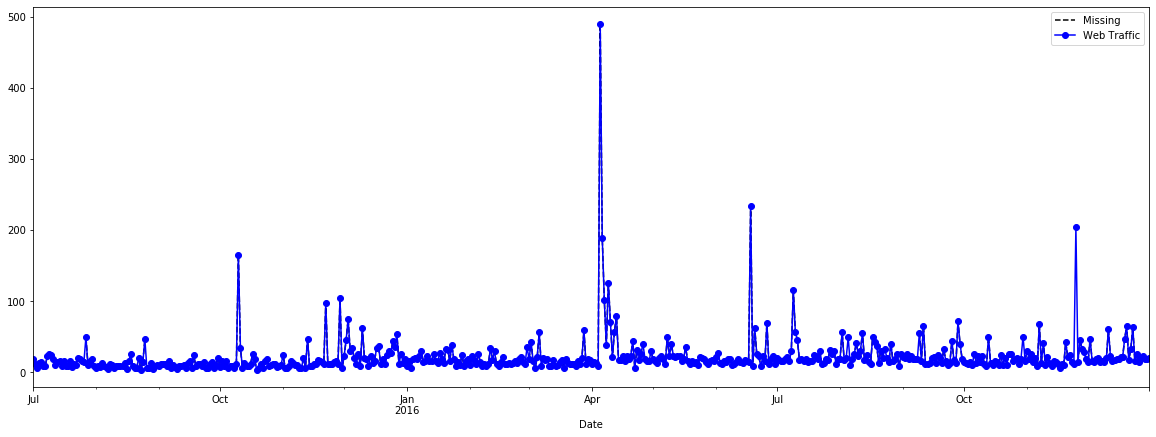

In [5]:
# Visualisation of Data
df.plot(style = ['k--', 'bo-', 'r*'], figsize = (20,7))

In [6]:
# Trying different methods for imputation

# Using mean and median

df = df.assign(mean = df.Missing.fillna(df.Missing.mean()))
df = df.assign(median = df.Missing.fillna(df.Missing.median()))


# Using rolling average

df = df.assign(RollMean = df.Missing.fillna(df.Missing.rolling(24, min_periods = 1).mean()))
df = df.assign(RollMedian = df.Missing.fillna(df.Missing.rolling(24, min_periods = 1).median()))


# Imputation using interpolation from sklearn with different methods

df = df.assign(Int_Time = df.Missing.interpolate(method = 'time'))
df = df.assign(Int_Akima = df.Missing.interpolate(method = 'akima'))
df = df.assign(Int_Cubic = df.Missing.interpolate(method = 'cubic'))
df = df.assign(int_Linear = df.Missing.interpolate(method = 'linear'))
df = df.assign(Int_Slinear = df.Missing.interpolate(method = 'slinear'))
df = df.assign(Int_Quadratic = df.Missing.interpolate(method = 'quadratic'))
df = df.assign(Int_Spline3 = df.Missing.interpolate(method = 'spline', order = 3))
df = df.assign(Int_Spline4 = df.Missing.interpolate(method = 'spline', order = 4))
df = df.assign(Int_Spline5 = df.Missing.interpolate(method = 'spline', order = 5))
df = df.assign(Int_Ploy5 = df.Missing.interpolate(method = 'polynomial', order = 5))
df = df.assign(Int_Ploy7 = df.Missing.interpolate(method = 'polynomial', order = 7))

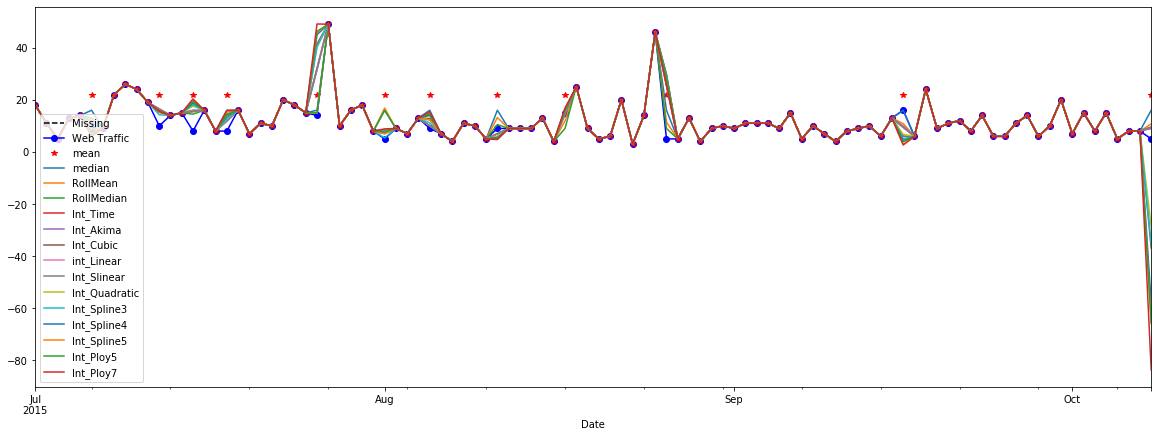

In [9]:
# Visualisation the results
df_plot = df.iloc[0:100, :]
df_plot.plot(style = ['k--', 'bo-', 'r*'], figsize = (20,7))

In [7]:
# Calculating metrices to compare the imputation method

results = [(method, r2_score(df['Web Traffic'], df[method]), rmse(df['Web Traffic'], df[method], axis = 0)) for method in list(df)[3:]]

results_df = pd.DataFrame(np.array(results), columns = ['Method', 'R_squared', 'RMSE'])

results_df.sort_values(by = 'R_squared', ascending = False)

,Method,R_squared,RMSE
0,median,0.9173448378013642,8.442102280184178
2,RollMedian,0.916441805166751,8.48809326484619
1,RollMean,0.9158662172794094,8.517278067635006
3,Int_Time,0.9126715253052489,8.67747868701712
6,int_Linear,0.9126715253052489,8.67747868701712
7,Int_Slinear,0.9126715253052489,8.67747868701712
4,Int_Akima,0.910480905024828,8.785641134712822
8,Int_Quadratic,0.8987918720642664,9.341644029969883
9,Int_Spline3,0.8955340133907173,9.490805503476961
5,Int_Cubic,0.8951553994986159,9.507988612484466
